In [31]:
import numpy as np
import subprocess 
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

EXECUTABLE = "sort.exe"
SEPARATOR = "||"
T_FLASH_SORT = '1'
T_FLASHY_SORT = '2'
T_IS_SORTED = '1'
INT = "--int"
FLOAT = "--float"
DOUBLE = "--double"

def eval(problem_sizes, dtypeopt=FLOAT, verbose=False):
    flash_sort_times = []
    flashy_sort_times = []
    nums = []
    for N in problem_sizes: 
        res1 = -1
        res2 = -1
        cmd = EXECUTABLE + " -s -n " + str(N) + " " + dtypeopt
        if verbose:
            print("Running:",cmd)
        outputraw = subprocess.run(cmd, capture_output=True) 
        output = {
            'code': outputraw.returncode,
            'stdout': outputraw.stdout.decode('utf-8'),
            'stderr': outputraw.stderr.decode('utf-8')
        }
        if output['stderr'] != "":   
            print("ERROR:\n",output['stderr'])
            return None 
        
        lines = output['stdout'].split('\n')
        placed = 2
        for l in lines: 
            tokens = l.split(SEPARATOR)
            if tokens[0] == T_FLASH_SORT:
                if tokens[1] == T_IS_SORTED:
                    res1 = float(tokens[2]) 
                placed-=1
            elif tokens[0] == T_FLASHY_SORT:
                if tokens[1] == T_IS_SORTED:
                    res2 = float(tokens[2])
                placed-=1
        if placed != 0: 
            print("error occured!\n----\nCMD:",cmd)
            print("\tRETCODE:",output['code'])
            print("\tSTDOUT:",output['stdout'])
            print("\tSTDERR:",output['stderr'])
            print("----")
        else:
            nums.append(N)
            flash_sort_times.append(res1)
            flashy_sort_times.append(res2)

    return nums, flash_sort_times, flashy_sort_times




In [32]:
n = list(range(int(1e5), int(1e7), int(1e5)))
n, y1, y2 = eval(n, dtypeopt=DOUBLE)
print("done")

error occured!
----
CMD: sort.exe -s -n 100000 --double
	RETCODE: 3221225477
	STDOUT: 1||1||3

	STDERR: 
----
error occured!
----
CMD: sort.exe -s -n 200000 --double
	RETCODE: 3221225477
	STDOUT: 1||1||11

	STDERR: 
----
error occured!
----
CMD: sort.exe -s -n 1300000 --double
	RETCODE: 3221225477
	STDOUT: 1||1||112

	STDERR: 
----
error occured!
----
CMD: sort.exe -s -n 2900000 --double
	RETCODE: 3221225477
	STDOUT: 1||1||304

	STDERR: 
----
done


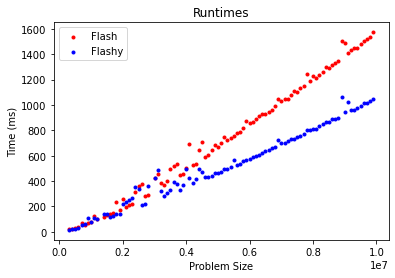

In [33]:
# Scatter plot of N vs Time
#print(len(n), len(y1), len(y2))
_, ax = plt.subplots()
ax.scatter(n, y1, marker='.', c='red')
ax.scatter(n, y2, marker='.', c='blue') 
ax.legend(['Flash', 'Flashy'])
ax.set(title="Runtimes", xlabel='Problem Size', ylabel='Time (ms)')
plt.show()   


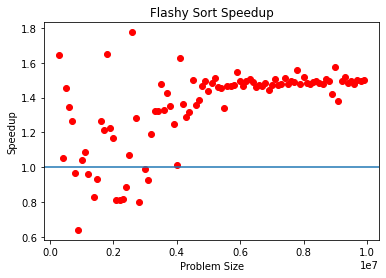

In [34]:
# Scatter plot of N vs Speedup
_, ax = plt.subplots()
y = np.array(y1)/np.array(y2)
ax.scatter(n, y, c='red') 
ax.axhline(1.0)  
ax.set(title="Flashy Sort Speedup", xlabel='Problem Size', ylabel='Speedup')
plt.show() 